In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [58]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [59]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

# Loading the Data

In [60]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [61]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last    float64
completion                     int64
start_step                   float64
1st_step                     float64
2nd_step                     float64
3rd_step                     float64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                 float64
logons_6_mnth                float64
date                          object
initial_date                  object
total_time_visit             float64
final_date                    object
d

## Categorical columns

In [62]:
df_control_final

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,last_step,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
0,2581,182925466_27021409208_83502_770616558_80928163524,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0,0.352793,0.000000,0.000000,0.000000,start,Control,4,58,22,M,2,0.800429,0.352793,0.514321,2017-04-09,2017-04-09 06:11:41,0.000000,2017-04-09 06:11:41
1,3647,492965200_82386590930_211259_742136411_9217069...,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0,0.352793,0.000000,0.000000,0.000000,start,Control,15,190,63,F,2,0.819775,0.514321,0.561701,2017-04-10,2017-04-10 12:28:09,0.000000,2017-04-10 12:28:09
2,5354,192604721_14077630095_819213_233679354_3649539...,0.152492,0.105690,0.183214,0.333186,0.0,0.534383,1,0.352793,0.352793,0.352793,0.352793,confirm,Control,4,58,50,Other,2,0.810656,0.441230,0.534383,2017-04-12,2017-04-12 20:30:01,0.406140,2017-04-12 20:31:31
3,5354,216367358_55024634523_791141_233679354_3649539...,0.083540,0.000000,0.000000,0.000000,0.0,0.486000,0,0.352793,0.352793,0.000000,0.000000,step_1,Control,4,58,50,Other,2,0.810656,0.441230,0.534383,2017-04-13,2017-04-13 20:22:33,0.083540,2017-04-13 20:22:39
4,7020,141218980_10356302866_412831_131463516_4591039...,0.183214,0.000000,0.000000,0.000000,0.0,0.486000,0,0.352793,0.352793,0.000000,0.000000,step_1,Control,16,195,41,F,2,0.810885,0.441230,0.534383,2017-04-09,2017-04-09 15:17:53,0.183214,2017-04-09 15:18:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,9991130,743177587_67515718465_948203_744199245_4509564...,0.143968,0.293219,0.382638,0.310019,0.0,0.534383,1,0.352793,0.352793,0.352793,0.352793,confirm,Control,17,211,25,M,2,0.809125,0.549605,0.580005,2017-04-07,2017-04-07 15:52:43,0.480034,2017-04-07 15:55:33
7884,9992229,229124868_49070966908_2013_392707553_90519001571,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0,0.352793,0.000000,0.000000,0.000000,start,Control,16,192,47,F,2,0.817867,0.441230,0.534383,2017-04-05,2017-04-05 20:27:42,0.000000,2017-04-05 20:27:42
7885,9994194,641797178_12669825949_819953_469829792_4969929...,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0,0.352793,0.000000,0.000000,0.000000,start,Control,20,250,33,M,2,0.808433,0.486000,0.549605,2017-04-20,2017-04-20 20:25:24,0.000000,2017-04-20 20:25:24
7886,9995265,702318250_2028572774_273570_932911574_27729644858,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0,0.352793,0.000000,0.000000,0.000000,start,Control,6,75,55,Other,2,0.801708,0.352793,0.514321,2017-04-08,2017-04-08 20:08:00,0.000000,2017-04-08 20:08:00


In [63]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['visit_visitor_id', 'last_step', 'variation', 'gendr', 'date',
       'initial_date', 'final_date'],
      dtype='object')

In [64]:
test_categorical_columns = ['last_step', 'gendr',]

In [65]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    7878
initial_date        7856
final_date          7847
date                  91
last_step              5
gendr                  3
variation              1
dtype: int64

In [66]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    3417
start      2594
step_1      928
step_3      494
step_2      455
Name: count, dtype: int64
Proportion: last_step
confirm    0.433190
start      0.328854
step_1     0.117647
step_3     0.062627
step_2     0.057683
Name: proportion, dtype: float64


In [67]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
Other    3146
F        2459
M        2283
Name: count, dtype: int64
Proportion: gendr
Other    0.398834
F        0.311739
M        0.289427
Name: proportion, dtype: float64


In [68]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,3417
1,start,2594
2,step_1,928
3,step_2,455
4,step_3,494


In [69]:
df_control_final['last_step'].value_counts()

last_step
confirm    3417
start      2594
step_1      928
step_3      494
step_2      455
Name: count, dtype: int64

In [70]:
tab_control_last_step = df_control_final['last_step'].value_counts().reset_index()
tab_control_last_step.columns = ['last_step', 'count']
tab_control_last_step

,last_step,count
0,confirm,3417
1,start,2594
2,step_1,928
3,step_3,494
4,step_2,455


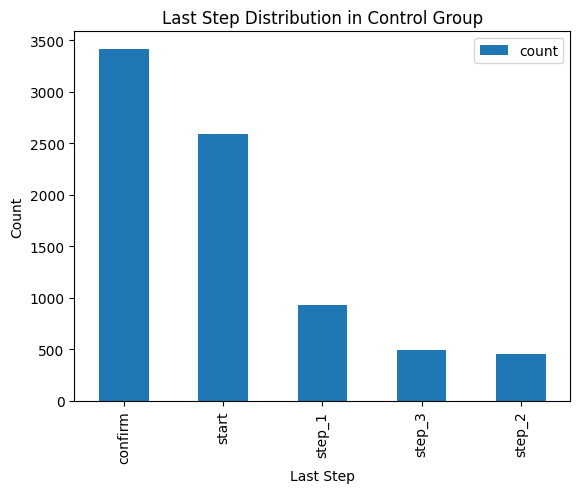

In [71]:
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()

In [72]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,2459
1,M,2283
2,Other,3146


In [73]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.31
1    0.29
2    0.40
Name: count, dtype: float64

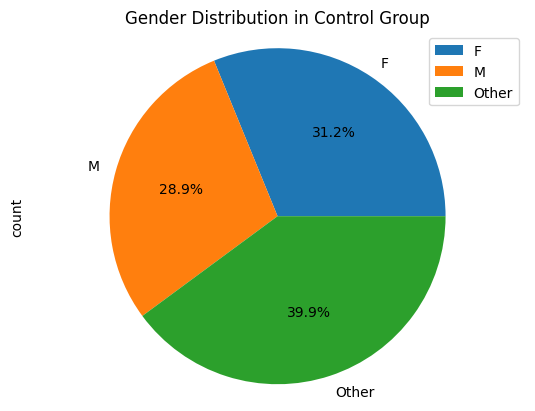

In [74]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

## Check the data types

### Centrality and Dispersion Measures

In [75]:
# Extracting column names with numerical data types from the dataframe
control_numerical_columns = df_control_final.select_dtypes("number").columns
print(control_numerical_columns)
print(df_control_final.dtypes)

Index(['client_id', 'start_time', 'step_1', 'step_2', 'step_3',
       'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'total_time_visit'],
      dtype='object')
client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last    float64
completion                     int64
start_step                   float64
1st_step                     float64
2nd_step                     float64
3rd_step                     float64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age             

In [76]:
control_numerical_columns = pd.DataFrame

In [77]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']
print(control_numerical_columns)

['start_time', 'step_1', 'step_2', 'step_3', 'time_completion', 'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'total_time_visit']


In [78]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

client_id                    6890
bal                          6882
total_time_visit              382
clnt_tenure_mnth              289
step_2                        218
step_3                        175
clnt_age                       76
start_time                     59
step_1                         48
clnt_tenure_yr                 25
navigations_bt_start_last       7
logons_6_mnth                   6
calls_6_mnth                    6
3rd_step                        3
1st_step                        3
completion                      3
2nd_step                        3
num_accts                       1
start_step                      1
time_completion                 1
dtype: int64

In [79]:
df_control_final.describe()

,client_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,total_time_visit
count,7.888000e+03,7888.000000,7888.000000,7888.000000,7888.000000,7888.0,7888.000000,7888.000000,7.888000e+03,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.0,7888.000000,7888.000000,7888.000000,7888.000000
mean,5.027892e+06,0.112963,0.090598,0.185063,0.151356,0.0,0.498442,0.433316,3.527925e-01,0.238513,0.200738,0.178137,10.560598,132.773580,45.064148,2.0,0.809560,0.474412,0.551315,0.271001
std,2.885458e+06,0.101311,0.099721,0.192215,0.178392,0.0,0.043377,0.496332,5.551467e-17,0.167355,0.179965,0.179994,5.500775,65.494622,15.537035,0.0,0.006007,0.073436,0.024639,0.217048
min,2.581000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0.000000,3.527925e-01,0.000000,0.000000,0.000000,2.000000,34.000000,17.000000,2.0,0.799851,0.352793,0.514321,0.000000
25%,2.530847e+06,0.000000,0.000000,0.000000,0.000000,0.0,0.441230,0.000000,3.527925e-01,0.000000,0.000000,0.000000,6.000000,75.000000,31.000000,2.0,0.804457,0.441230,0.534383,0.000000
50%,5.064550e+06,0.105690,0.071558,0.143968,0.000000,0.0,0.534383,0.000000,3.527925e-01,0.352793,0.352793,0.000000,9.000000,117.000000,44.000000,2.0,0.808832,0.486000,0.549605,0.352793
75%,7.534123e+06,0.190157,0.152492,0.380873,0.333186,0.0,0.534383,1.000000,3.527925e-01,0.352793,0.352793,0.352793,14.000000,179.000000,58.000000,2.0,0.813886,0.549605,0.580005,0.476225
max,9.998921e+06,0.350505,0.322111,0.504725,0.484258,0.0,0.571637,3.000000,3.527925e-01,0.441230,0.441230,0.441230,26.000000,323.000000,93.000000,2.0,0.823105,0.549605,0.580005,0.561883


In [80]:
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

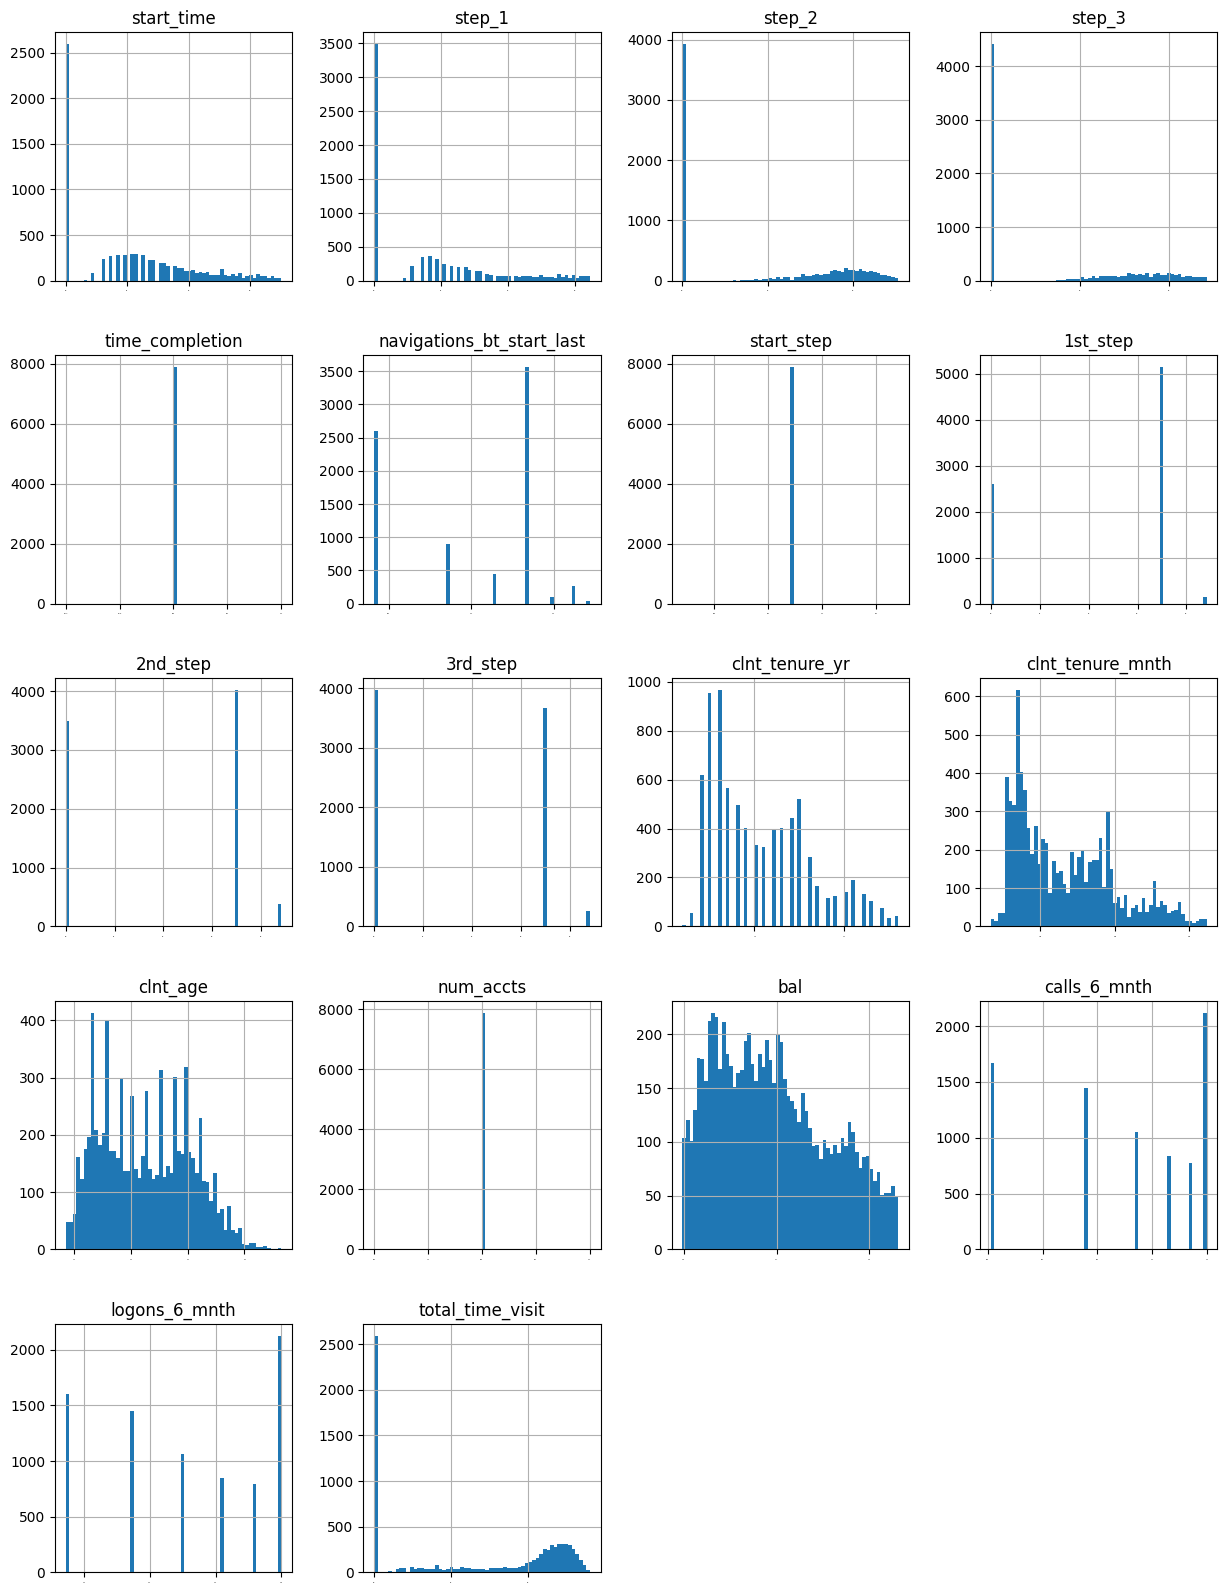

In [81]:
# Plotting histograms for the numerical columns before removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [82]:
# Applying IQR method to each specified column
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
    df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

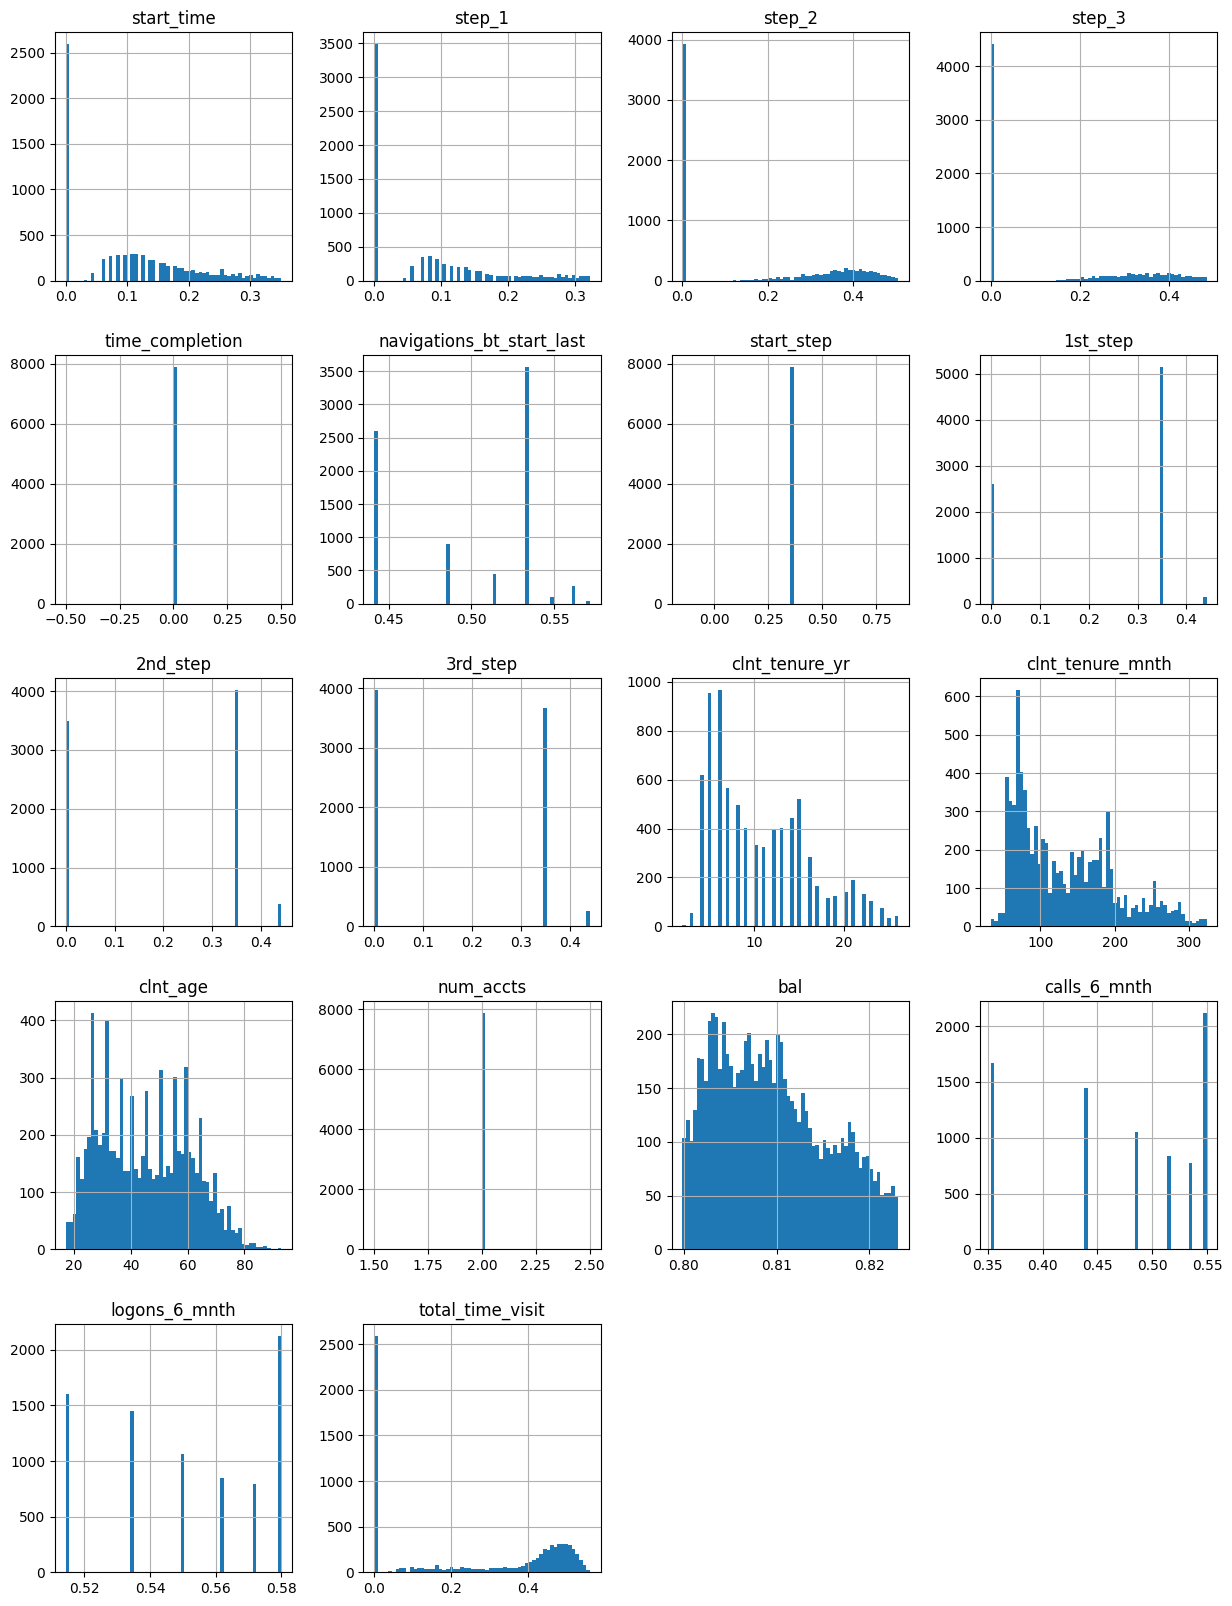

In [83]:
# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

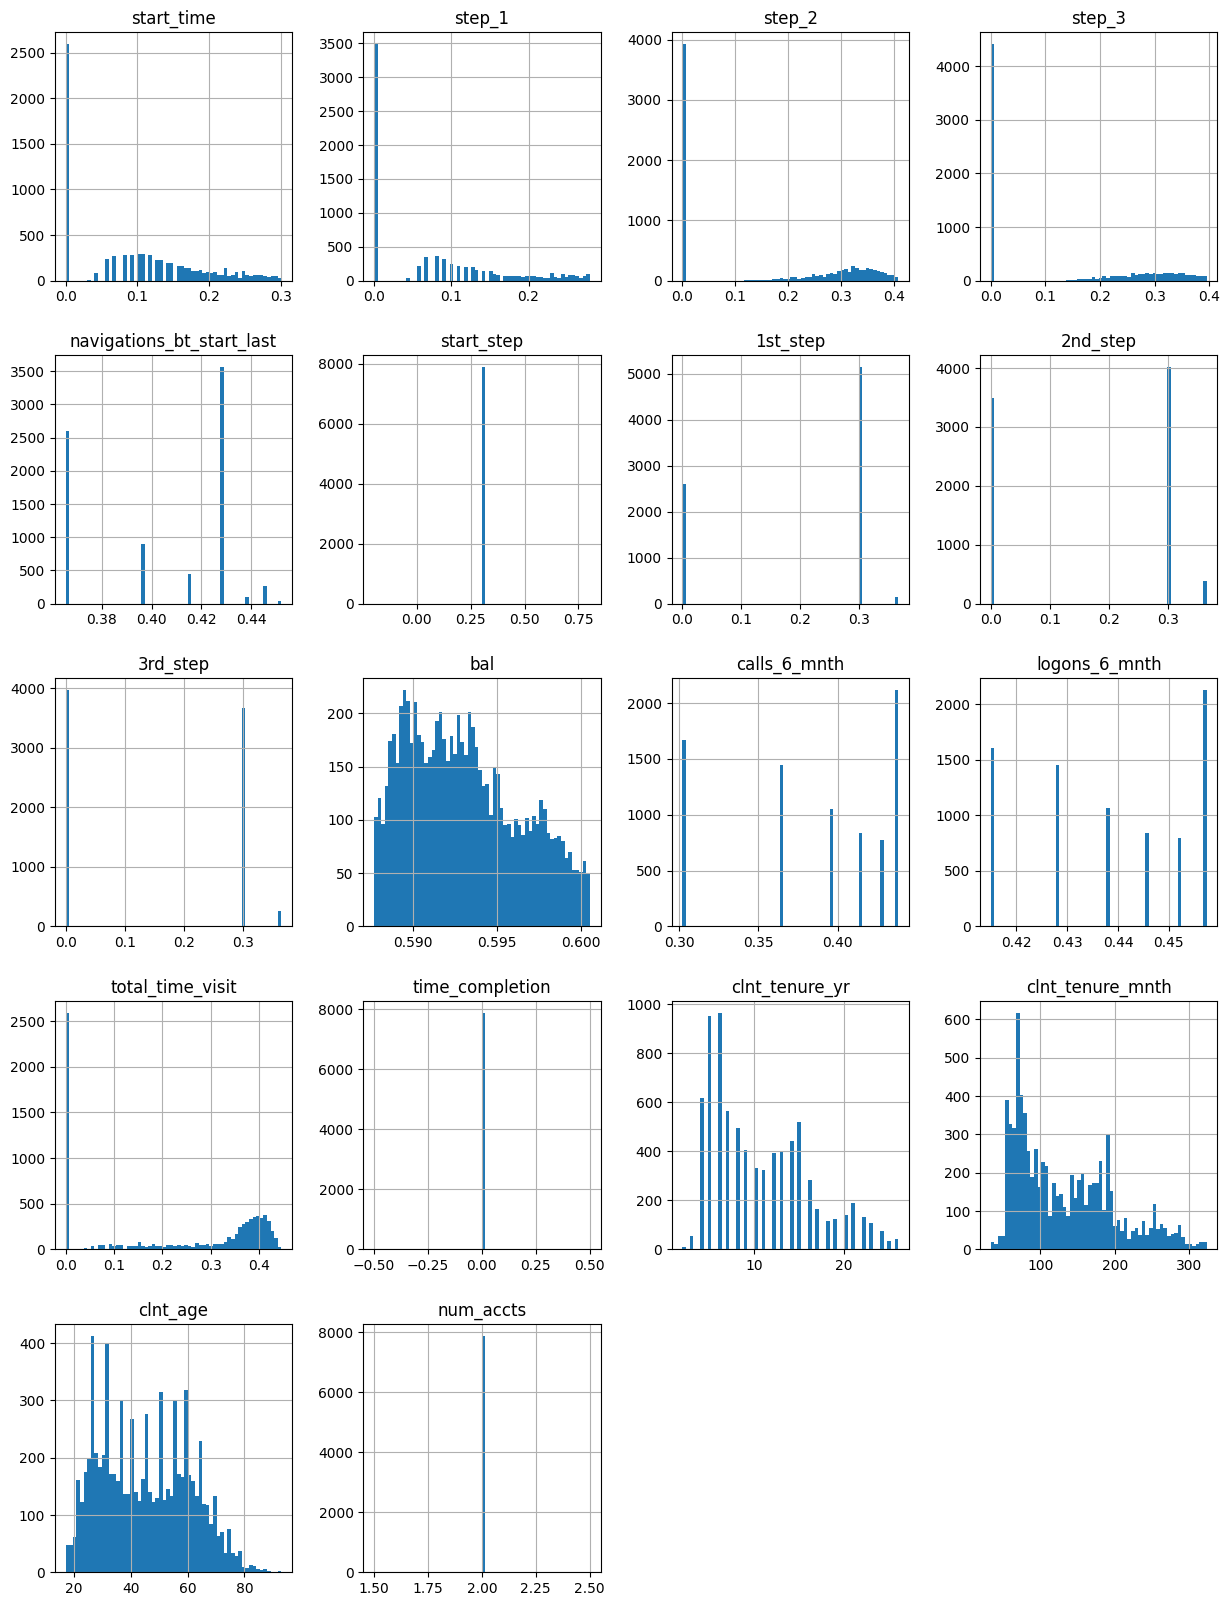

In [84]:
# List of columns to apply log transformation
log_transform_columns = [
    'start_time', 'step_1', 'step_2', 'step_3', 'navigations_bt_start_last',
    'start_step', '1st_step', '2nd_step', '3rd_step', 'bal',
    'calls_6_mnth', 'logons_6_mnth', 'total_time_visit'
]
# Applying log transformation
for column in log_transform_columns:
    df_control_final[column] = np.log1p(df_control_final[column])

# Reapplying IQR method to each specified column after log transformation
control_numerical_columns = log_transform_columns + [
    'time_completion', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts'
]
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns]) 

# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);


In [85]:
df_control_final.to_csv('../Data/Cleaned_Data/df_control_final.csv', index=False)  

# df_test

## Check the data types

## Univariate Analysis - df_test

In [86]:
df_test_final = convert_data_types_final(df_test_final)


## Categorical columns

In [87]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'variation', 'gendr'], dtype='object')

In [88]:
test_categorical_columns = ['last_step', 'gendr']

In [89]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    4705
client_id           4670
last_step              3
gendr                  3
variation              1
dtype: int64

In [90]:
frequency_proportion(df_test_final, 'last_step')

Frequency:last_step
confirm    4359
step_3      352
start         1
Name: count, dtype: int64
Proportion: last_step
confirm    0.925085
step_3     0.074703
start      0.000212
Name: proportion, dtype: float64


In [91]:
frequency_proportion(df_test_final, 'gendr')

Frequency:gendr
Other    1893
F        1488
M        1331
Name: count, dtype: int64
Proportion: gendr
Other    0.401740
F        0.315789
M        0.282470
Name: proportion, dtype: float64


In [92]:
cross_table(df_test_final, 'start_time')

,start_time,count
0,0.00,1
1,0.03,42
2,0.05,275
3,0.07,474
4,0.08,497
5,0.10,481
6,0.12,457
7,0.13,413
8,0.15,420
9,0.17,336


In [93]:
frequency_proportion(df_test_final, 'start_time')

Frequency:start_time
0.08    497
0.10    481
0.07    474
0.12    457
0.15    420
0.13    413
0.17    336
0.18    313
0.05    275
0.20    245
0.22    190
0.23    145
0.25    126
0.27     99
0.28     85
0.30     62
0.32     51
0.03     42
0.00      1
Name: count, dtype: int64
Proportion: start_time
0.08    0.105475
0.10    0.102080
0.07    0.100594
0.12    0.096986
0.15    0.089134
0.13    0.087649
0.17    0.071307
0.18    0.066426
0.05    0.058362
0.20    0.051995
0.22    0.040323
0.23    0.030772
0.25    0.026740
0.27    0.021010
0.28    0.018039
0.30    0.013158
0.32    0.010823
0.03    0.008913
0.00    0.000212
Name: proportion, dtype: float64


In [94]:
tab_test_last_step = cross_table(df_test_final, 'last_step')
tab_test_last_step

,last_step,count
0,confirm,4359
1,start,1
2,step_3,352


In [95]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum()).round(2)

0    0.93
1    0.00
2    0.07
Name: count, dtype: float64

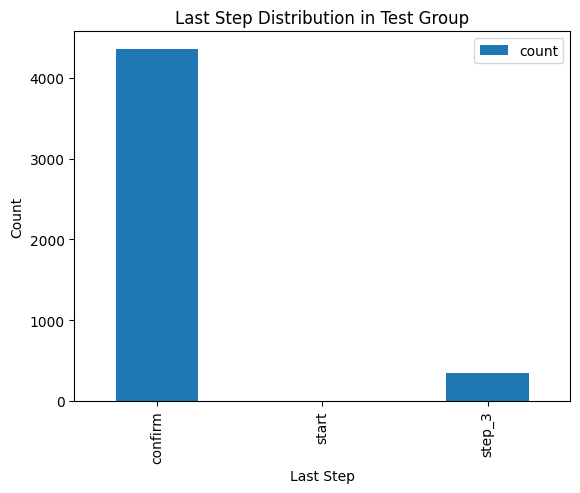

In [96]:
tab_test_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

In [97]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


,gendr,count
0,F,1488
1,M,1331
2,Other,1893


In [98]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

0    0.32
1    0.28
2    0.40
Name: count, dtype: float64

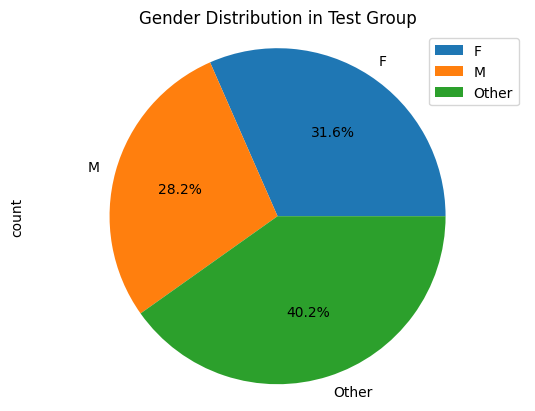

In [99]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [100]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit'],
      dtype='object')

In [101]:
df_test_final.dtypes

client_id                            object
visit_visitor_id                     object
start_time                          float64
step_1                              float64
step_2                              float64
step_3                              float64
time_completion                     float64
navigations_bt_start_last             int64
completion                             bool
start_step                            int64
1st_step                              int64
2nd_step                              int64
3rd_step                              int64
last_step                            object
variation                            object
clnt_tenure_yr                        int64
clnt_tenure_mnth                      int64
clnt_age                              int64
gendr                                object
num_accts                             int64
bal                                 float64
calls_6_mnth                          int64
logons_6_mnth                   

In [102]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']

In [103]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'time_completion',
 'navigations_bt_start_last',
 'start_step',
 '1st_step',
 '2nd_step',
 '3rd_step',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth',
 'total_time_visit']

In [104]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


clnt_tenure_mnth             284
clnt_age                      69
step_2                        38
step_3                        33
step_1                        32
clnt_tenure_yr                25
total_time_visit              24
start_time                    19
calls_6_mnth                   7
logons_6_mnth                  7
bal                            3
2nd_step                       1
1st_step                       1
start_step                     1
navigations_bt_start_last      1
time_completion                1
num_accts                      1
3rd_step                       1
dtype: int64

In [105]:
df_test_final.describe()

,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.0,4712.0,4712.0,4712.0,4712.0,4712.0,4712.000000,4712.000000,4712.000000,4712.0,4712.000000,4712.000000,4712.000000,4712,4712,4712.000000,4712
mean,0.140522,0.205963,0.357152,0.268366,0.0,5.0,1.0,1.0,1.0,1.0,10.388795,130.780136,42.154499,2.0,0.809919,2.656834,5.682301,2017-04-18 10:53:59.388794624,2017-04-19 01:00:38.560483840,0.452678,2017-04-19 01:03:04.767826944
min,0.000000,0.030000,0.130000,0.000000,0.0,5.0,1.0,1.0,1.0,1.0,2.000000,33.000000,17.000000,2.0,0.800000,0.000000,3.000000,2017-03-15 00:00:00,2017-03-15 11:04:50,0.310000,2017-03-15 11:06:18
25%,0.080000,0.150000,0.310000,0.220000,0.0,5.0,1.0,1.0,1.0,1.0,6.000000,75.000000,30.000000,2.0,0.800000,1.000000,4.000000,2017-04-02 00:00:00,2017-04-02 20:26:53.500000,0.420000,2017-04-02 20:29:43.500000
50%,0.130000,0.200000,0.360000,0.270000,0.0,5.0,1.0,1.0,1.0,1.0,9.000000,115.000000,40.000000,2.0,0.810000,2.000000,5.000000,2017-04-12 00:00:00,2017-04-12 13:48:13.500000,0.460000,2017-04-12 13:50:16
75%,0.180000,0.260000,0.410000,0.340000,0.0,5.0,1.0,1.0,1.0,1.0,14.000000,177.000000,53.000000,2.0,0.810000,5.000000,8.000000,2017-04-24 00:00:00,2017-04-24 14:37:13,0.490000,2017-04-24 14:39:12
max,0.320000,0.380000,0.500000,0.460000,0.0,5.0,1.0,1.0,1.0,1.0,26.000000,323.000000,87.000000,2.0,0.820000,6.000000,9.000000,2017-06-20 00:00:00,2017-06-20 22:29:18,0.540000,2017-06-20 22:32:06
std,0.065288,0.075897,0.073482,0.105018,0.0,0.0,0.0,0.0,0.0,0.0,5.349427,63.780955,14.375056,0.0,0.007041,2.141567,2.135776,NaN,NaN,0.043968,NaN


In [106]:
df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 

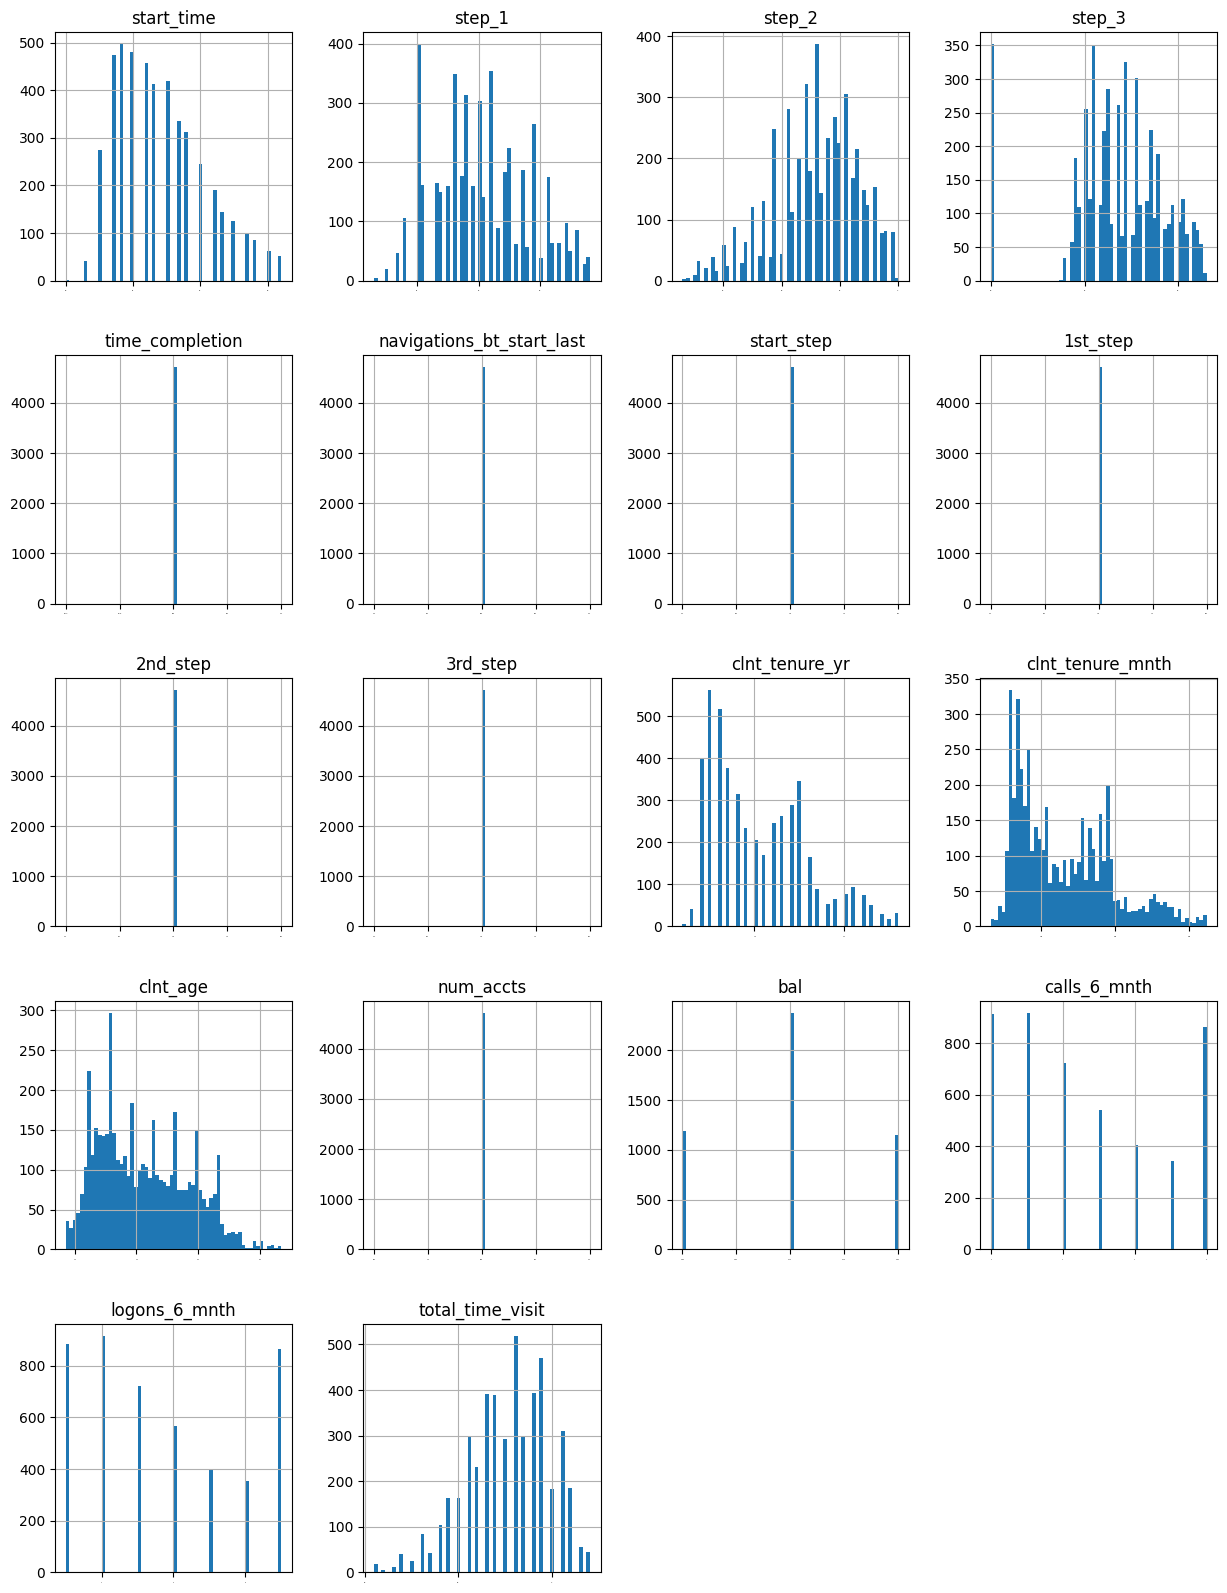

In [107]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [108]:
for column in test_numerical_columns:
    df_test_final = remove_outliers_iqr(df_test_final, column)

    df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 


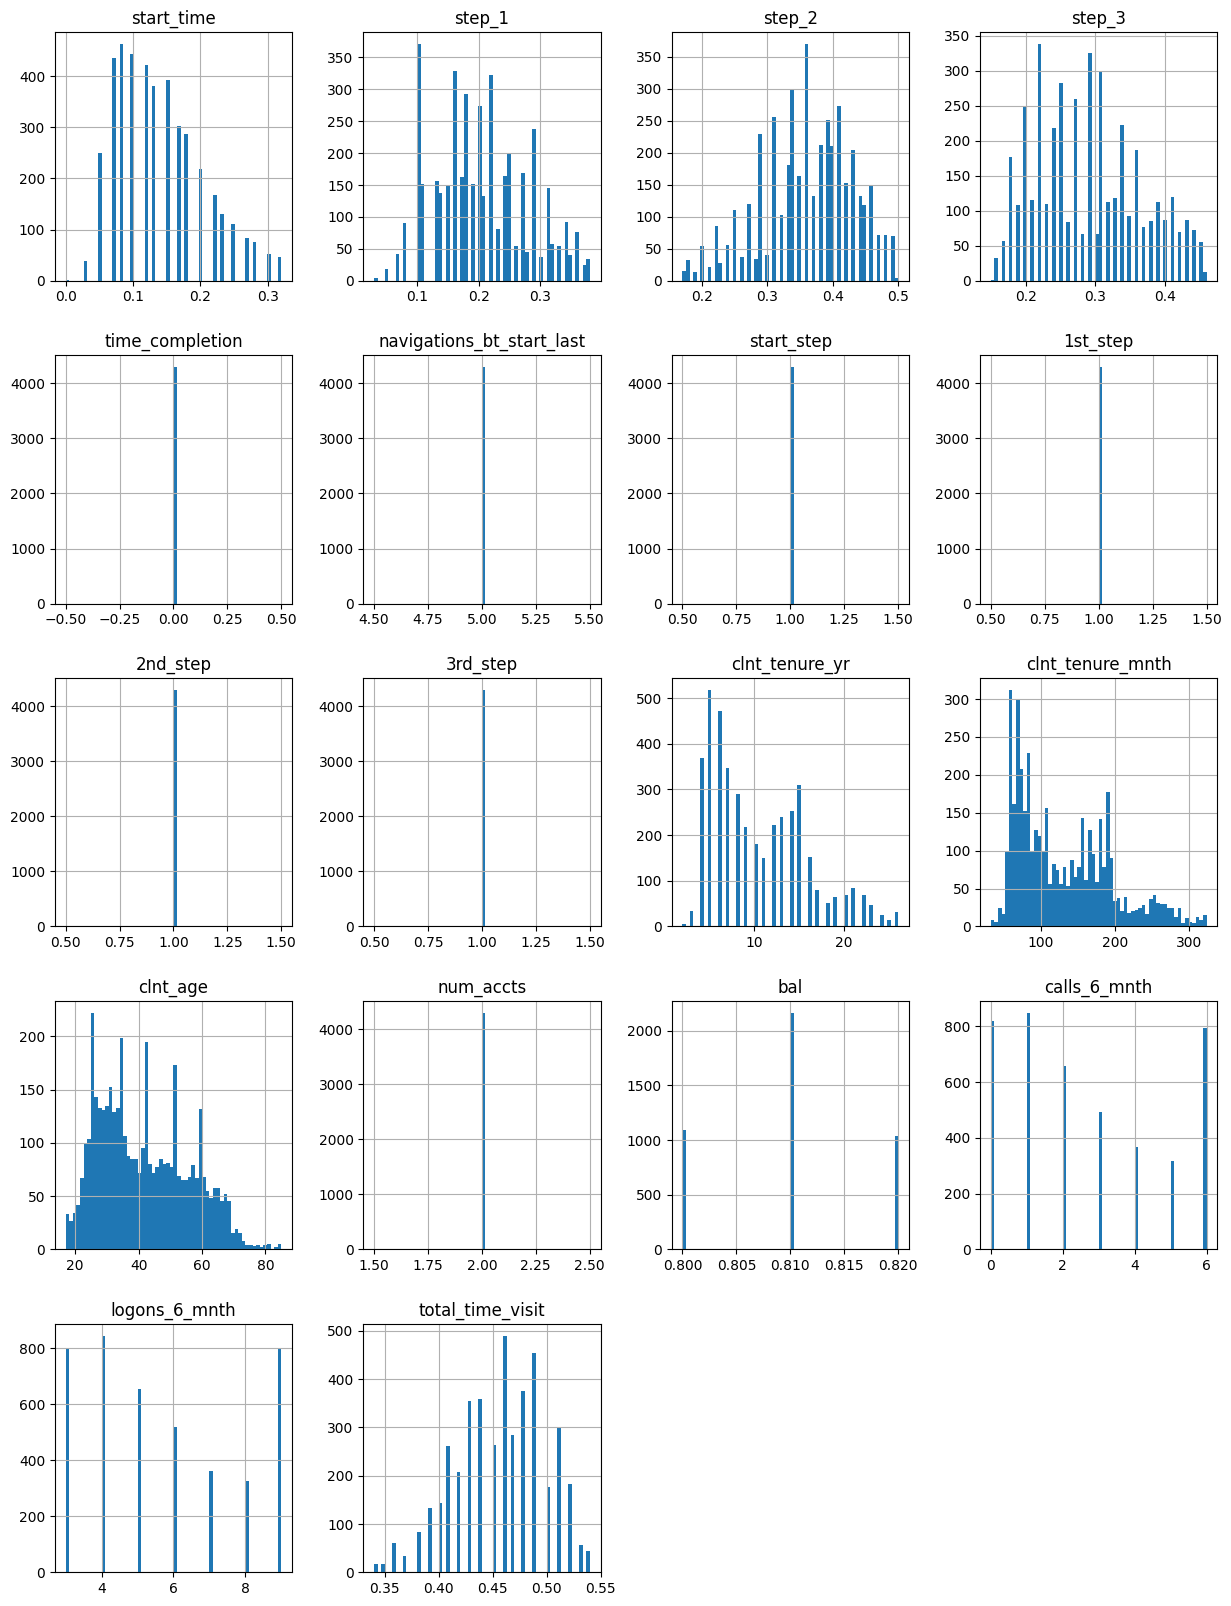

In [109]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [110]:
# List of columns to apply log transformation
log_transform_columns = ['step_1', 'step_2', 'step_3', 'bal', 'total_time_visit']

# Apply log transformation
for column in log_transform_columns:
    df_test_final[column] = np.log1p(df_test_final[column])


In [111]:
df_test_final = df_test_final.to_csv('../Data/Cleaned_Data/df_test_final.csv', index=False)

# Comparisons